In [1]:
from pattern_matcher import PatternMatcher
from database_access import DatabaseAccess
from preprocessor import Preprocessor
from extracter_analyzer import *
from plotter import Plotter
from dbscan import DbScan

from collections import Counter
import os

In [2]:
def get_reviews():
    db_file = r"amazon_reviews_us_shoes_v1_00_2015_top10000_bad.db"
    db_file = os.getcwd() + '\data\\' + db_file

    db = DatabaseAccess(db_file)
    return db.retrive_reviews()

In [3]:
def get_review(sentence_tuple):
    review = preproc.split_review_into_sentences(original_review_bodys[sentence_tuple[1]])
    return review[sentence_tuple[2]]

In [4]:
def perform_tf_idf_and_print(min_df=0.05, max_df=0.9):
    print("\n<----- Tf Idf Starts ----->")
    tf_idf_review_bodys = get_tfidf(
        [sen[0] for sen in cleaned_review_bodys], min_df=min_df, max_df=max_df)

    # print results
    print(tf_idf_review_bodys)
    return tf_idf_review_bodys

In [5]:
def perform_db_scan(data, min_samples_val, eps_val):
    print("\n<----- Db Scan Starts ----->")

    dbscan = DbScan()
    dbres = dbscan.perform_db_scan(
        data, min_samples_val, eps_val)  
    
    return dbres
    
def plot_db_scan(dbres, data, min_samples_val, eps_val, dataset_name):
    plotter = Plotter()
    title = dataset_name + " - eps: " + \
        str(eps_val) + ", min_samples: " + str(min_samples_val)
    plotter.plot_cluster(dbres, data, title)

In [6]:
def extract_results(labels, original_data, review_bodys):
    # print number of elements in each cluster
    cluster_counts = Counter(labels)
    print(cluster_counts)

    clusters = {}
    pattern_matcher = PatternMatcher()
    # find and print dbscan result on actual text data - review_bodys
    for i in set(labels):
        if i != -1:  # do not print if noise (-1)
            clusters[i] = []
            print(i, "----")
            for x in range(len(review_bodys)):
                if labels[x] == i:
                    
                    print(">>> Cleaned review ->", (review_bodys[x][0]))
                    
                    sentence = get_review(review_bodys[x])
                    matches = pattern_matcher.find_matches(sentence)
                    clusters[i].append((review_bodys[x][0], sentence, matches))
                    
                    print(">>> Review sentence ->", sentence, "\n")
                    
    return pattern_matcher.extract_objects(clusters)


In [7]:
def stringify_results(objects):

    objects_text = ""
    adjectives_text = ""

    for obj in objects:
        for key in obj.keys():
            if not (key in objects_text):
                objects_text += " " + key
        for value in obj.values():
            for val in value:
                opinion,_,_,_= val
                if opinion is not None and not (opinion in adjectives_text):
                    adjectives_text += " " + opinion
    return objects_text, adjectives_text

In [35]:
def plot_wordcloud(text):
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt

    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 14).generate(text) 

    # plot the WordCloud image                        
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 

    plt.savefig('adjectives.jpg', bbox_inches='tight')
    plt.show()

In [10]:
def print_results(results):
    print("<<< Extracted Objects and Opinions >>>")
    for i, cluster in enumerate(results):
        print("\n>>> Cluster ", i, "<<<")

        for obj, opinion in cluster.items():
            print("-- ", obj, ": ", opinion)

In [11]:
# initializations
dataset_name = "SHOES"

# get reviews from database
data_frame = get_reviews()

original_review_bodys = list(data_frame["review_body"])

preproc = Preprocessor()

Connected to database!


In [12]:
data_frame = None  # to free memory space

# clear reviews body with preprocessing, inside preprocessing.py
cleaned_review_bodys = preproc.clear_reviews(
    original_review_bodys, data_size=10000)

Original Sentence:  Junk, they are falling apart.
Preprocessed Sentence:  junk
Original Sentence:  The back is too tall and very uncomfortable.
Preprocessed Sentence:  back
Original Sentence:  I love this brand but I do not recommend this model.
Preprocessed Sentence:  brand model
Original Sentence:  The shoes ran small and the clasp was broken when it arrived.
Preprocessed Sentence:  ran clasp
Original Sentence:  The first time I put them on the zipper broke.
Preprocessed Sentence:  time zipper
Original Sentence:  A total loss of my money.
Preprocessed Sentence:  loss money
Original Sentence:  The sole broke in one shift.
Preprocessed Sentence:  broke shift
Original Sentence:  And by broke I mean I had a chunk fall off.
Preprocessed Sentence:  broke chunk fall
Original Sentence:  What I got was something so horrifically uncomfortable that I decided that I'd rather go barefoot.
Preprocessed Sentence:  something barefoot
Original Sentence:  If cleats separate during play it could lead t

Preprocessed Sentence:  buckle area
Original Sentence:  I'm sad to send it back but the style doesn't work for my feet.
Preprocessed Sentence:  style work
Original Sentence:  This second pair I recieved in May and the sole is falling off already!
Preprocessed Sentence:  pair sole
Original Sentence:  The pads of heal cup were worn off in a month!
Preprocessed Sentence:  cup month
Original Sentence:  Maybe I got a bad set?
Preprocessed Sentence:  set
Original Sentence:  This bag deserved NO star at all.
Preprocessed Sentence:  bag star
Original Sentence:  Will never buy this inferior product again.
Preprocessed Sentence:  product
Original Sentence:  Not great quality.
Preprocessed Sentence:  quality
Original Sentence:  I am frustrated since I am already having to buy new shoes only 3 weeks after school started.
Preprocessed Sentence:  school
Original Sentence:  The shoe heel broke on the shoe after opening the box and walking around the house in the shoes to get them broken in.
Preproces

Original Sentence:  I also have a pair of Keen waterproof boots that I absolutely LOVE but during the summer months they were making my feet nasty so I figured I would try these out.
Preprocessed Sentence:  pair boot summer
Original Sentence:  They didn't help at all.
Preprocessed Sentence:  help
Original Sentence:  Cute but hurt like hell.
Preprocessed Sentence:  cute hell
Original Sentence:  This is the worst design I have ever tried.
Preprocessed Sentence:  design
Original Sentence:  The straps were of poor quality material, broke before I could wrap them around my waist  Once I was able to piece one of the straps together, the strap twisted, rolled and never stayed in place.
Preprocessed Sentence:  quality material waist strap place
Original Sentence:  The soles were so thin, even that hurt my feet.
Preprocessed Sentence:  sol
Original Sentence:  Not sure what type of running these were designed for, but the weren't for me!
Preprocessed Sentence:  type
Original Sentence:  HAD BEEN 

Original Sentence:  I thought about reordering but then my Mom who is a 7 tried the 8 on and they didn't fit her either.
Preprocessed Sentence:  either
Original Sentence:  Awkward shape and way.
Preprocessed Sentence:  shape way
Original Sentence:  Too boxy and up close, the color is ugly.
Preprocessed Sentence:  color
Original Sentence:  The other had a defect and could not unzip halfway down.
Preprocessed Sentence:  defect
Original Sentence:  The boots i have worn for years finally broke down and I was hoping these would be a replacement.
Preprocessed Sentence:  boot replacement
Original Sentence:  I would NOT recommend this item to anyone.
Preprocessed Sentence:  item anyone
Original Sentence:  So narrow that I couldn't fit my foot past the arch.
Preprocessed Sentence:  foot arch
Original Sentence:  I returned the sandals fo the wide size and they were just as bad as the regular width.
Preprocessed Sentence:  size width
Original Sentence:  It looks like Chaco's has molding problem w

Original Sentence:  Absolutely not worth the cost.
Preprocessed Sentence:  cost
Original Sentence:  Waste of money.
Preprocessed Sentence:  waste money
Original Sentence:  No way to fix suede.
Preprocessed Sentence:  way suede
Original Sentence:  A complete waste of money.
Preprocessed Sentence:  waste money
Original Sentence:  Cute purse, but not well made.
Preprocessed Sentence:  purse
Original Sentence:  <br />The bad news is that they are the most uncomfortable things I've ever worn: the laces (even tho adjustable) cut into the top of my foot, and the band across the toes has a seam  ON THE INSIDE that cut (literally lacerated) my 5th toe on top: this after 2 hours of wear in the water while snorkeling.
Preprocessed Sentence:  news cut top foot band seam inside toe top wear water
Original Sentence:  shame on you CLARKS you use such a cheap inner sole for a product that has your name brand on it.
Preprocessed Sentence:  shame inner sole product name brand
Original Sentence:  When I 

Original Sentence:  No good for high arches!
Preprocessed Sentence:  arch
Original Sentence:  Unfortunately, these do not qualify for &#34;free return&#34;.
Preprocessed Sentence:  return
Original Sentence:  I just got them and the leather quality is very poor, they seem to be plastic made instead.
Preprocessed Sentence:  quality
Original Sentence:  It's a shame I cannot get the correct size with my American size number.
Preprocessed Sentence:  shame size size number
Original Sentence:  EDIT: these shoes are so horribly uncomfortable to wear i can never wear them any more.
Preprocessed Sentence:  edit
Original Sentence:  No Charge.
Preprocessed Sentence:  charge
Original Sentence:  &#34; When we decided they did not work for us, we returned them, and were denied a refund, and only offered store credit.
Preprocessed Sentence:  refund store credit
Original Sentence:  The shoes we sent back had a few superficial dirt marks on the white colored soles, other than that were brand new.
Prepro

Original Sentence:  Waste of moneY.
Preprocessed Sentence:  waste money
Original Sentence:  Not good for people with narrow feet.
Preprocessed Sentence:  people
Original Sentence:  There is no give or stretch.
Preprocessed Sentence:  give stretch
Original Sentence:  He has worn them for 15 days, and the black, rubber sole has shredded and is falling off.
Preprocessed Sentence:  day rubber sole
Original Sentence:  I guess you get what you pay for, do not buy.
Preprocessed Sentence:  guess
Original Sentence:  Used less than 2 weeks -- seams separating, inside pocket zipper broke on first use, very flimsy vinyl, totally useless.
Preprocessed Sentence:  pocket zipper use vinyl
Original Sentence:  Nice shoe but horrible insole!
Preprocessed Sentence:  shoe insole
Original Sentence:  Cute but broke the first 20 min I had them on.
Preprocessed Sentence:  cute min
Original Sentence:  My wife feels pain when she try them on.
Preprocessed Sentence:  wife pain
Original Sentence:  Worst basketball

Preprocessed Sentence:  review product question
Original Sentence:  From the other reviews, maybe mine were marked with the wrong size because they were TIGHT!
Preprocessed Sentence:  mine size
Original Sentence:  Poor Quality!
Preprocessed Sentence:  quality
Original Sentence:  They suggested I just give this  pair to someone else,  and take the loss.
Preprocessed Sentence:  pair someone loss
Original Sentence:  <br /><br />Edited: after wearing these  shoes for the third time, the tongue on the left shoe pulled lose.
Preprocessed Sentence:  time tongue shoe
Original Sentence:  Very poor quality and not what I expect from shoes that are so expensive.
Preprocessed Sentence:  quality
Original Sentence:  I'm sorry, but these are cheap-a$$ shoes now.
Preprocessed Sentence:  sorry
Original Sentence:  Nothing like the original manufacturer.
Preprocessed Sentence:  nothing manufacturer
Original Sentence:  <br /><br />I hate what this world is becoming.
Preprocessed Sentence:  world
Original 

Original Sentence:  Otherwise $158 for glasses that broke in less than 5 months is a ridiculous amount of money and I would not do business with them again.
Preprocessed Sentence:  glass amount money business
Original Sentence:  They are cheap, the material used is very brittle and the laces are just as bad.
Preprocessed Sentence:  material
Original Sentence:  The spikes of the cleats are rubber, I wish that in the DETAILS they would have told the consumer that they are rubber, I was expecting plastic cleats, I was wrong.
Preprocessed Sentence:  consumer
Original Sentence:  Thanks to the poor description of the product.
Preprocessed Sentence:  thanks description product
Original Sentence:  Broke within the first day of my wife wearing them.
Preprocessed Sentence:  broke day wife
Original Sentence:  The shoe was so wide, I could not figure out if a strap was missing or not.
Preprocessed Sentence:  shoe strap
Original Sentence:  Very cute shoe but very narrow and not comfortable at all.


Original Sentence:  not worth the hassle to me.
Preprocessed Sentence:  hassle
Original Sentence:  Worse walking shoes ever.
Preprocessed Sentence:  walking
Original Sentence:  I have worn them 4 times during my 12 hour hospital shift.
Preprocessed Sentence:  time hour hospital shift
Original Sentence:  Walk about 12-15 miles a shift and I was in total agony.
Preprocessed Sentence:  walk shift agony
Original Sentence:  Regretful!
Preprocessed Sentence:  regretful
Original Sentence:  To my dismay when I opened the box, the shoes had markings on it and some noticeably weird glue that was visible.
Preprocessed Sentence:  dismay box glue
Original Sentence:  These are supposed to be brand new shoes and this is completely unacceptable.
Preprocessed Sentence:  brand
Original Sentence:  This pair had a shorter foot bed so that they did not fit as well as my previous pair.
Preprocessed Sentence:  pair foot pair
Original Sentence:  I just thought well to bad as it was needed to be able to fine y

Original Sentence:  I can't believe how badly my feet hurt and I have 2 hours and 45 minutes left in the day.
Preprocessed Sentence:  hurt day
Original Sentence:  My toes hurt and the tops of my feet are blistered where they rubbed.
Preprocessed Sentence:  hurt top
Original Sentence:  I received the wrong size.
Preprocessed Sentence:  size
Original Sentence:  It hurts my left foot, can't wear them all day.
Preprocessed Sentence:  foot day
Original Sentence:  It doesn't look like the picture, poor quality!
Preprocessed Sentence:  picture quality
Original Sentence:  Unfortunately, I ordered a brown shoelace and when I received it, it was blue.
Preprocessed Sentence:  shoelace
Original Sentence:  I needed this in a timely manner and unfortunately, all my eggs were in this one basket when I received the wrong color.
Preprocessed Sentence:  manner one basket color
Original Sentence:  Early reviewers had warned about the fact these shoes run wide and there is no way to adjust the width - wha

Original Sentence:  Not new----- my boots came scratch and dirty.
Preprocessed Sentence:  boot scratch dirty
Original Sentence:  These shoes suck.
Preprocessed Sentence:  suck
Original Sentence:  They are way too big and I need to utilize the free return shipping but there was no packing slip or return label or any other info in the box.
Preprocessed Sentence:  way return slip box
Original Sentence:  They are man made material and don't look anything like the picture.
Preprocessed Sentence:  man material anything picture
Original Sentence:  Very disappointed, would not recommend especially for the price.
Preprocessed Sentence:  price
Original Sentence:  I bought these elsewhere; however, I feel compelled to WARN you that the sueded insole caused my foot to slide around as I walked, which got my pinky toe caught outside the front forefoot strap, resulting in PAIN.
Preprocessed Sentence:  foot toe forefoot strap pain
Original Sentence:  Good idea, bad result.
Preprocessed Sentence:  idea

Original Sentence:  Although the arch hits in the right spot, the elastic bands were far too loose and the toes were enormous.
Preprocessed Sentence:  arch spot
Original Sentence:  In addition, the heel piece rubs me in the wrong spot.
Preprocessed Sentence:  addition heel spot
Original Sentence:  Only 30 days and those shoes are damage, I paid I lot of money for them.
Preprocessed Sentence:  day lot money
Original Sentence:  This bag looks nothing like the photo!
Preprocessed Sentence:  bag nothing photo
Original Sentence:  Poor quality for the price.
Preprocessed Sentence:  quality price
Original Sentence:  Very disappointing - waste of money.
Preprocessed Sentence:  waste money
Original Sentence:  They are useless unless you plan to exclusively wear them while driving a car, boat, or around a carpeted house.
Preprocessed Sentence:  car boat house
Original Sentence:  not comfortable, instep to deep and put pressure on front of foot.
Preprocessed Sentence:  instep pressure front foot


Original Sentence:  needless to say I had quite a disappointed 10 year old and we went with a different brand.
Preprocessed Sentence:  year brand
Original Sentence:  A real danger for the eyes!
Preprocessed Sentence:  danger
Original Sentence:  Bought for wildland fire.
Preprocessed Sentence:  bought fire
Original Sentence:  <br /><br />My biggest complaint is the hoops La Sportiva is making me jump thru to get these swapped out.
Preprocessed Sentence:  complaint la jump
Original Sentence:  They don't want to just replace them, they want me to pay shipping back to them, and then wait weeks for a resolution.
Preprocessed Sentence:  resolution
Original Sentence:  Dudes, it's fire season and I have work to do.
Preprocessed Sentence:  fire season work
Original Sentence:  I found out Lowa gives firefighters a $100 discount on their wildland fire boot.
Preprocessed Sentence:  discount fire boot
Original Sentence:  A terrible shoe!
Preprocessed Sentence:  shoe
Original Sentence:  These sneake

Original Sentence:  While they claim to offer a two-year warranty for manufacturing defects, neither their website nor the written material included with the packaging provides any phone number or email address to actually reach a company representative.
Preprocessed Sentence:  year warranty material phone number address company representative
Original Sentence:  Absolutely horrible boots.
Preprocessed Sentence:  boot
Original Sentence:  VERY VERY poor quality boots.
Preprocessed Sentence:  quality boot
Original Sentence:  hell Wal-Mart boots are better than this garbage.
Preprocessed Sentence:  hell boot garbage
Original Sentence:  One of the shoe lace holders broke (while tightening the laces) the second time I wore them.
Preprocessed Sentence:  shoe lace time
Original Sentence:  This tote is not a good buy.
Preprocessed Sentence:  tote buy
Original Sentence:  She said her upper boot pulled away from the lower rubber tread after 4 months.
Preprocessed Sentence:  boot rubber tread
Ori

Preprocessed Sentence:  experience shoe bar market
Original Sentence:  The box was crushed in many places, the soles and lining inside the shoes were pulling away from the bottom of the shoe.
Preprocessed Sentence:  box sol bottom shoe
Original Sentence:  I would not recommend anyone buy these shoes.
Preprocessed Sentence:  anyone
Original Sentence:  Your worker lost my shoes ,I have no received my shoes by now !
Preprocessed Sentence:  worker
Original Sentence:  The production line made a mistake.
Preprocessed Sentence:  production line mistake
Original Sentence:  He wore them exactly one week and there are already holes worn in the mesh on the top of both shoes.
Preprocessed Sentence:  week mesh top
Original Sentence:  Extremely disappointed in the quality.
Preprocessed Sentence:  quality
Original Sentence:  I would not recommend these shoes anyone.
Preprocessed Sentence:  anyone
Original Sentence:  If you're a nuclear physicist, you might be able to figure this crap out.
Preprocesse

Original Sentence:  The bottom soles and cleats just broke away and came off!
Preprocessed Sentence:  sol
Original Sentence:  I don't recommend this particular product.
Preprocessed Sentence:  recommend product
Original Sentence:  I am not sure why but my daughter owns a 8.
Preprocessed Sentence:  daughter
Original Sentence:  Tried to avoid the store but now have to waste time mailing and still have to do at the store.
Preprocessed Sentence:  store time store
Original Sentence:  These shoes were a big disappointment.
Preprocessed Sentence:  disappointment
Original Sentence:  The footbed was smooth plastic that I knew would be sticky and uncomfortable on my feet.
Preprocessed Sentence:  plastic
Original Sentence:  Shoes came dirty and scuffed up.
Preprocessed Sentence:  dirty
Original Sentence:  Now I have a $79 piece of crap.
Preprocessed Sentence:  piece crap
Original Sentence:  Poor workmanship Clarks!
Preprocessed Sentence:  workmanship
Original Sentence:  Item is DEFECTIVE as there

Original Sentence:  Too bad because these look good but the engineers who designed these didn't test the materials used and so I returned them for a refund which I received quickly.
Preprocessed Sentence:  test refund
Original Sentence:  Too narrow, bad fit.
Preprocessed Sentence:  fit
Original Sentence:  The weird, circular configuration in the sole of this shoe hurt my foot when I walked so I had to return it.
Preprocessed Sentence:  configuration sole shoe foot
Original Sentence:  The strap that connects to the chain broke the next day.
Preprocessed Sentence:  strap chain day
Original Sentence:  Unfortunately by the time he told me about it, the 30 day return policy had expired.
Preprocessed Sentence:  time day policy
Original Sentence:  The strap on the scandal broke the first time I put these on.
Preprocessed Sentence:  strap scandal time
Original Sentence:  I wear an 8 in sandals and a 7 was still a bit loose.
Preprocessed Sentence:  bit
Original Sentence:  Looks nothing like the

Original Sentence:  Shoes were uncomfortable maybe order a size up from what you normally wear but I was not pleased and no good arch support.
Preprocessed Sentence:  order size arch support
Original Sentence:  The lining was a cheap almost plastic material and the fringe ripped off and the strap broke as well.
Preprocessed Sentence:  lining material fringe strap
Original Sentence:  Very uncomfortable plastic shoe.
Preprocessed Sentence:  plastic shoe
Original Sentence:  Very disappointing because it is a very cute bag.
Preprocessed Sentence:  bag
Original Sentence:  Walking in these will give you a rash.
Preprocessed Sentence:  rash
Original Sentence:  Again, no Nine West shoes vary in size with all styles.
Preprocessed Sentence:  size
Original Sentence:  Quite possibly the most painful shoe I've ever worn.
Preprocessed Sentence:  shoe
Original Sentence:  Strap broke within 2 days of wearing around the house.
Preprocessed Sentence:  strap day house
Original Sentence:  Arrived broken.


Original Sentence:  I will give one star for pretty shoes, and minus five for irritation, illogic, rip-offs and insults.
Preprocessed Sentence:  star pretty minus irritation illogic rip
Original Sentence:  I feel bad sending them back, but I'm feeling more angry as time goes on.
Preprocessed Sentence:  time
Original Sentence:  I decided not to return them because it didn't seem worth the hassle.
Preprocessed Sentence:  hassle
Original Sentence:  NOT ORIGINAL FOSSIL.
Preprocessed Sentence:  fossil
Original Sentence:  Bad quality!
Preprocessed Sentence:  quality
Original Sentence:  I don't know what the hell went wrong.
Preprocessed Sentence:  hell
Original Sentence:  <br />Either Amazon sells knock-offs or Teva's gone crazy!
Preprocessed Sentence:  knock
Original Sentence:  What a disappointment!
Preprocessed Sentence:  disappointment
Original Sentence:  The tinted-lens glasses are useless to me.
Preprocessed Sentence:  lens glass
Original Sentence:  <br />Disappointed considering the p

Original Sentence:  You cannot relax and forget about them, as you must continually concentrate on keeping them on your feet, otherwise you'll find yourself shoe-less.
Preprocessed Sentence:  otherwise shoe
Original Sentence:  This sandal would be a waste of your money even if you only paid $3.
Preprocessed Sentence:  sandal waste money
Original Sentence:  I have worn them maybe 8 - 10 times.
Preprocessed Sentence:  time
Original Sentence:  I can not return them and feel i got a defected pair.
Preprocessed Sentence:  pair
Original Sentence:  very poor, if it wasn't for return cost I would have sent them back, they fell apart at the airport on second use.
Preprocessed Sentence:  return cost airport use
Original Sentence:  Ordered these, broke within a day and didn't even come with the hard case that it is advertised with.
Preprocessed Sentence:  day case
Original Sentence:  Also, there is a ridge under the toes that was very high and uncomfortable.
Preprocessed Sentence:  ridge
Original

Original Sentence:  Now to test Sperry's definition of 'manufacturing defect'.
Preprocessed Sentence:  definition defect
Original Sentence:  the strips are too short, there is no way that they could fit anybody feets it was a waste of money.
Preprocessed Sentence:  way anybody waste money
Original Sentence:  I bought the shoes for my wedding in October and they don't fit.
Preprocessed Sentence:  wedding fit
Original Sentence:  I'm not paying to have them shipped back and unfortunately now I'm stuck trying to find some crappy pair that won't match my dress like these did.
Preprocessed Sentence:  pair match dress
Original Sentence:  I am hoping the pair of shoes I was shipped were just defective.
Preprocessed Sentence:  pair
Original Sentence:  I hate that my feet can no longer the heel and I feel like I am going to fall out.
Preprocessed Sentence:  heel
Original Sentence:  The one shoe I did receive is horrible!
Preprocessed Sentence:  shoe receive
Original Sentence:  Had to return (and

Original Sentence:  No thanks.
Preprocessed Sentence:  thanks
Original Sentence:  I have purchased several other Skechers brand sandals in this same size 8, but these did not fit.
Preprocessed Sentence:  brand size
Original Sentence:  As soon as I received the purse I was disappointed because it was different from the picture.
Preprocessed Sentence:  purse picture
Original Sentence:  Much larger, different shade of brown and very poor quality of fabric than I expected.
Preprocessed Sentence:  shade quality fabric
Original Sentence:  The hardware that connects the strap broke in the first week.
Preprocessed Sentence:  hardware strap week
Original Sentence:  Throwing this purse out, waste of money.
Preprocessed Sentence:  purse waste money
Original Sentence:  Too bad they are falling apart because of poor design and materials.
Preprocessed Sentence:  design
Original Sentence:  The fabric on the top is either worn or the whole thing was ripped apart.
Preprocessed Sentence:  fabric top wor

Preprocessed Sentence:  purse strap purse
Original Sentence:  It's unfortunate as it was a cute purse and worked well to hold wallet, keys, phone but poor quality.
Preprocessed Sentence:  purse wallet phone quality
Original Sentence:  I've offered these sunglasses before but in the black and lavender cause they broke and they lasted me a year.
Preprocessed Sentence:  lavender cause year
Original Sentence:  The first had damaged leather from the machine that sews the sole on.
Preprocessed Sentence:  leather machine sole
Original Sentence:  After two strikes, I just asked for my money back.
Preprocessed Sentence:  money
Original Sentence:  This product was defected the strap were sewed on wrong.
Preprocessed Sentence:  product strap
Original Sentence:  Not true to size at all.
Preprocessed Sentence:  size
Original Sentence:  I am very disappointed with the quality of this purse.
Preprocessed Sentence:  quality purse
Original Sentence:  The sneakers didn't help my plantar fasciitis.
Prepr

Preprocessed Sentence:  quality
Original Sentence:  I except shoes to last a lot longer and am quite shocked at how quickly they fell apart.
Preprocessed Sentence:  lot
Original Sentence:  I guess these shoes are perfect if you need a cheap pair for a costume with only a few uses but other than that, I would not recommend them.
Preprocessed Sentence:  guess pair costume
Original Sentence:  I have doubts about the authenticity of the item.
Preprocessed Sentence:  authenticity item
Original Sentence:  The price is about $30 lower than retail at Michael Kors website.
Preprocessed Sentence:  price
Original Sentence:  Awful wearing shoe to be on concrete with.
Preprocessed Sentence:  shoe concrete
Original Sentence:  Absolutely the worse pair of boots I have ever put on my feet.
Preprocessed Sentence:  pair boot
Original Sentence:  These were way to snug, narrow, and cut too high so they rubbed against the ankle bone.
Preprocessed Sentence:  way ankle bone
Original Sentence:  However, there

Preprocessed Sentence:  shoe half right middle material
Original Sentence:  When I was told by the company that the shoe was defected, I asked for a different style in the shoe, I was told that this item was no longer available.
Preprocessed Sentence:  company shoe style shoe item
Original Sentence:  I'm disappointed with the quality of their product and customer service.
Preprocessed Sentence:  quality product customer service
Original Sentence:  I have a wide foot, and the edge between the lining and the sole mold was pushing into the sole of my foot uncomfortably.
Preprocessed Sentence:  foot edge lining mold sole foot
Original Sentence:  ripped/broke after about 3 months, but I guess you get what you pay for!
Preprocessed Sentence:  broke guess
Original Sentence:  I bought this  one size bigger based on reviews but that didn't help as the show is just too narrow.
Preprocessed Sentence:  size help show
Original Sentence:  Sad.
Preprocessed Sentence:  sad
Original Sentence:  Sad.
Pre

Original Sentence:  Havent even worn them for fear people will smell them too.
Preprocessed Sentence:  havent fear people
Original Sentence:  Unfortunately, these sandals did not work for me.
Preprocessed Sentence:  work
Original Sentence:  The outside strap that goes around my baby toe is most uncomfortable and my heel slips off the side of the sandal, returned.
Preprocessed Sentence:  strap baby toe heel side sandal
Original Sentence:  I thought that Reef's were made in brazil, these seemed cheap and said they were made in China, Not impressed.
Preprocessed Sentence:  reef cheap china
Original Sentence:  Returned  Good Idea but the cut out toes are too long unless you have prehensile toes.
Preprocessed Sentence:  idea cut
Original Sentence:  After a few months the inside material is falling apart on both boots.
Preprocessed Sentence:  material boot
Original Sentence:  I can not return them so I will cut out the inside lining as it continues to delaminate.
Preprocessed Sentence:  lini

Preprocessed Sentence:  money
Original Sentence:  Not true to size and it hurt after wearing it for 30 minutes.
Preprocessed Sentence:  size
Original Sentence:  I was not going to complain until I started wearing my brown pair daily and the exact same thing happened but even worse.
Preprocessed Sentence:  thing
Original Sentence:  I will pay double next time for the real deal from SEBAGO web page!
Preprocessed Sentence:  time deal web page
Original Sentence:  Not true to size.
Preprocessed Sentence:  size
Original Sentence:  It's as though they are were sized in error!
Preprocessed Sentence:  error
Original Sentence:  Plastic frame cracked the first time worn.
Preprocessed Sentence:  plastic frame time worn
Original Sentence:  However, I am not satisfied with these boots on several levels.
Preprocessed Sentence:  boot
Original Sentence:  not at all comfortable just around the house.
Preprocessed Sentence:  house
Original Sentence:  Speaking of laces, the lacing system for these boots i

Preprocessed Sentence:  quality boot product
Original Sentence:  Disappointed on the inside material.
Preprocessed Sentence:  material
Original Sentence:  I was so disappointed, as I have been wearing Clark shoes for many years.
Preprocessed Sentence:  clark
Original Sentence:  Please call me regarding this problem.
Preprocessed Sentence:  problem
Original Sentence:  The sunglasses delivered to me look nothing like these.
Preprocessed Sentence:  nothing
Original Sentence:  The lining slid around near the toes revealing a gluey gross mess.
Preprocessed Sentence:  lining gluey mess
Original Sentence:  Read the other complaints, many complaints of the front seams ripping open.
Preprocessed Sentence:  front
Original Sentence:  They where only worn indoors but looks so battered after a few days that I was embarrassed to wear them!
Preprocessed Sentence:  indoors day
Original Sentence:  Been a regular user of ASICS, this is the first time I am disappointed.
Preprocessed Sentence:  user time


Original Sentence:  Glasses look very nice, but on the right lens, large defect.
Preprocessed Sentence:  glass right defect
Original Sentence:  When I received it I was so DISAPPOINTED and DISMAYED, because it is MADE IN CHINA.
Preprocessed Sentence:  china
Original Sentence:  the leather strap  between the toes irritated my feet.
Preprocessed Sentence:  leather strap
Original Sentence:  Sad because they are nice boots.
Preprocessed Sentence:  sad boot
Original Sentence:  No surprise.
Preprocessed Sentence:  surprise
Original Sentence:  Uni-sex doesn't really fit a ladies foot.
Preprocessed Sentence:  sex lady foot
Original Sentence:  lousy.
Preprocessed Sentence:  lousy
Original Sentence:  One time through the wash and they were ruined.
Preprocessed Sentence:  time wash
Original Sentence:  Never once had this problem.
Preprocessed Sentence:  problem
Original Sentence:  Very disappointing product.
Preprocessed Sentence:  product
Original Sentence:  Cheaply made and no quality.
Preproce

Original Sentence:  I noticed people complaining that the right boot feels wrong.
Preprocessed Sentence:  people boot
Original Sentence:  These would be fine if you simply wanted to store your shoes with a cedar filling, but they do not expand more than 1/3 of an inch.
Preprocessed Sentence:  cedar inch
Original Sentence:  Not a great product and I returned mine.
Preprocessed Sentence:  product mine
Original Sentence:  If the shoe is made in Viet Nam instead of China it is cut too narrow and not long enough and the material is not as good.
Preprocessed Sentence:  shoe china material
Original Sentence:  Have ordered different sizes and all were cut to narrow.
Preprocessed Sentence:  size
Original Sentence:  I didn't like them they are to small the size on these shoes are just made so small.
Preprocessed Sentence:  size
Original Sentence:  Cheap Cheap Cheap The leather on these shoes is so cheap and ugly!
Preprocessed Sentence:  cheap leather
Original Sentence:  on the bottom of the sole

Preprocessed Sentence:  bottom shoe
Original Sentence:  We did not like the quality, and where way to big, another sandal from this company was to small?
Preprocessed Sentence:  quality way sandal company
Original Sentence:  To bad Dockers puts out such a substandard product.
Preprocessed Sentence:  product
Original Sentence:  strap is way too loose.
Preprocessed Sentence:  strap way
Original Sentence:  Don't fit.
Preprocessed Sentence:  fit
Original Sentence:  I also find the material to be really hot which also makes them uncomfortable to wear.
Preprocessed Sentence:  material
Original Sentence:  I will say that the footbed is extremely cushy and comfortable but overall I'm not satisfied with these shoes, especially for the money I spent on them.
Preprocessed Sentence:  money
Original Sentence:  In fact the messy, tarry goo ended up all over my feet and toes--very difficult to remove.
Preprocessed Sentence:  fact messy tarry goo
Original Sentence:  I rarely has been used this shoes a

Preprocessed Sentence:  boot top foot ankle heel
Original Sentence:  What was left in the bottom was the glue that wasn't too bad to walk on but once the shoes dried it made walking very uncomfortable.
Preprocessed Sentence:  bottom glue
Original Sentence:  Very disappointed in the quality.
Preprocessed Sentence:  quality
Original Sentence:  I've tried purchasing these twice to no avail, I may try once again, if I can find a 12ww.
Preprocessed Sentence:  avail
Original Sentence:  When I got them I realized on one of the boots the tongue was cut off.
Preprocessed Sentence:  boot tongue
Original Sentence:  I was very disappointed and will hopefully return them and get a replacement.
Preprocessed Sentence:  replacement
Original Sentence:  This pair was exactly the same size, just poor quality control.
Preprocessed Sentence:  pair size quality control
Original Sentence:  The straps have a very strong stinky odor that gives me a horrible headache.
Preprocessed Sentence:  odor headache
Origi

Original Sentence:  It started a few days into wearing them and is rapidly getting worse.
Preprocessed Sentence:  day
Original Sentence:  Fake Ray-Ban .
Preprocessed Sentence:  ray ban
Original Sentence:  Only one problem-the black die came off on my feet-ugh!
Preprocessed Sentence:  problem die
Original Sentence:  Very poor quality in the strap.
Preprocessed Sentence:  quality strap
Original Sentence:  I do not recommend this wallet at all.
Preprocessed Sentence:  wallet
Original Sentence:  It is very flimsy and cheap felling, and is not worth the money.
Preprocessed Sentence:  felling money
Original Sentence:  Very disappointed in this product from fossil.
Preprocessed Sentence:  product fossil
Original Sentence:  <br />However, when I read a label inside the pouch I  was disturbed.
Preprocessed Sentence:  label
Original Sentence:  <br />It says &#34;Warning: this product contains chemicals known to the state of California to cause cancer or birth defects or other reproductive harm&#

Original Sentence:  The smell was so bad that they stunk up a room with the box closed.
Preprocessed Sentence:  smell room box
Original Sentence:  Didn't help at all.
Preprocessed Sentence:  help
Original Sentence:  I own many pairs of sketchers, sneakers, sandals, flip flops & Mary Janes, and have always worn 7.
Preprocessed Sentence:  mary
Original Sentence:  I had to stuff tissues in the toes of the shoes because I had awful blisters from the rubbing/flipping & flopping, of the too big shoes.
Preprocessed Sentence:  rubbing
Original Sentence:  These shoes resulted in plantar fasciitis and sore heels.
Preprocessed Sentence:  plantar sore
Original Sentence:  Sholes to alleviate the discomfort.
Preprocessed Sentence:  discomfort
Original Sentence:  I've worn them one full day and the vertical seam at the back of the heal is already coming apart.
Preprocessed Sentence:  day seam back heal
Original Sentence:  Didn't fit.
Preprocessed Sentence:  fit
Original Sentence:  Also, the workmansh

Preprocessed Sentence:  house heel sole plastic
Original Sentence:  After less than 30 minutes, there were already signs of imminent catastrophic failure.
Preprocessed Sentence:  failure
Original Sentence:  The design of this flip flop is terrible with respect to, as another reviewer put it, &#34;where the bit b/w your toes goes&#34;.
Preprocessed Sentence:  design flip flop respect reviewer bit
Original Sentence:  The WORST part is that I ordered a 7, didn't like the fit (as described above) and then tried a size 8 and it was the same but worse.
Preprocessed Sentence:  part fit size
Original Sentence:  The sole itself is very comfortable but the stress of walking around for even an hour was so tight where the strap was resting on the top of my foot that it's not worth wearing.
Preprocessed Sentence:  stress hour strap top foot
Original Sentence:  After the first use (about an hour or so), the bottom starts peeling out and it makes it extremely uncomfortable to walk on.
Preprocessed Se

Original Sentence:  The bottom fits but the top flops around.
Preprocessed Sentence:  bottom
Original Sentence:  these sandals are quite a disappointment given how cute they look on the website pic.
Preprocessed Sentence:  disappointment pic
Original Sentence:  I bought them in brown colour and the colour in person is not as bright as on the photo.
Preprocessed Sentence:  colour colour person photo
Original Sentence:  Unfortunate.
Preprocessed Sentence:  unfortunate
Original Sentence:  <br /> the bag is in very poor condition.
Preprocessed Sentence:  bag condition
Original Sentence:  This one has a section which was pricking the side of my foot.
Preprocessed Sentence:  section side foot
Original Sentence:  Considering I've been a life long owner of these sandals I'm an utterly disappointed.
Preprocessed Sentence:  life owner
Original Sentence:  Just to try this shoes (it was not fit) I paid $20 (its half the price of the shoes).
Preprocessed Sentence:  price
Original Sentence:  I am ve

Preprocessed Sentence:  pain memory foam side
Original Sentence:  Smelled awful too.
Preprocessed Sentence:  awful
Original Sentence:  I am so disappointed with these FitFlops and the way they fit!
Preprocessed Sentence:  way
Original Sentence:  Top of shoe cuts across the bone area under big toe making shoe very uncomfortable.
Preprocessed Sentence:  top shoe bone area toe
Original Sentence:  <br />And I am stuck with them now because I didn't try them on until now (past the 30 days return period) and DNAFootwear closed my return without any comment like sorry, etc.
Preprocessed Sentence:  day period return comment sorry
Original Sentence:  Just a bad design.
Preprocessed Sentence:  design
Original Sentence:  I was surprised that being a Rockport product it didn't fit better.
Preprocessed Sentence:  product
Original Sentence:  They do not accept exchange or return.
Preprocessed Sentence:  exchange
Original Sentence:  Waste of money!
Preprocessed Sentence:  waste money
Original Sentenc

Original Sentence:  Broke with in a week.
Preprocessed Sentence:  broke week
Original Sentence:  I didn't use it for one day and the buckle on one of the straps broke.
Preprocessed Sentence:  use day buckle broke
Original Sentence:  My worst mistake is I waited so long to actually use it, it is eligible for return!
Preprocessed Sentence:  mistake return
Original Sentence:  sadly I never realized the star rating for this shoe or I would never have ordered them.
Preprocessed Sentence:  star rating shoe
Original Sentence:  to make matters worse my dog ran off with the box and you have to pay to return their shoes.
Preprocessed Sentence:  dog box
Original Sentence:  <br />please stay clear, you will regret it and it's just a waste of $15.
Preprocessed Sentence:  waste
Original Sentence:  My feet were killing me after a couple of hours.
Preprocessed Sentence:  couple
Original Sentence:  Unfortunately, I can't return since I wore them already.
Preprocessed Sentence:  return
Original Sentence

Original Sentence:  Returns not easy I unfortunately ordered two and had the same issue.
Preprocessed Sentence:  issue
Original Sentence:  U get wat you pay for I guess.
Preprocessed Sentence:  guess
Original Sentence:  I am returning then but did not receive any paperwork, no receipt, return label or shipping labels.
Preprocessed Sentence:  return label shipping
Original Sentence:  After wearing these for a week, my Achilles heel hurt so bad that I'm having to return these shoes.
Preprocessed Sentence:  week heel
Original Sentence:  I am not sure if it's the lack of heel support in the shoe - but there is no grip in the heel at all.
Preprocessed Sentence:  lack heel support shoe grip heel
Original Sentence:  Very cheaply made glasses, and so small they look awful.
Preprocessed Sentence:  glass
Original Sentence:  They look nothing like shown here.
Preprocessed Sentence:  nothing
Original Sentence:  The metal nosepiece produced a glare inside the lense that was completely distracting.


Original Sentence:  Sad part is I only wore them ONCE, I'm an Amazon employee, and the site says I was supposed to return them by July 18th, 2015!
Preprocessed Sentence:  part employee site
Original Sentence:  Now I'm stuck with this shoe and the silver and white loafer!
Preprocessed Sentence:  shoe silver loafer
Original Sentence:  :-(  Even though I'm an Amazon employee.
Preprocessed Sentence:  employee
Original Sentence:  Very disappointed with the bag .
Preprocessed Sentence:  bag
Original Sentence:  I do not recommend this product.
Preprocessed Sentence:  product
Original Sentence:  Shipped wrong size.
Preprocessed Sentence:  size
Original Sentence:  Guess you get what you pay for.
Preprocessed Sentence:  guess
Original Sentence:  very disappointed in these shoes, after a couple of months they are tearing out on the side and the toe is ripped out.
Preprocessed Sentence:  couple side toe
Original Sentence:  I REPEAT, DO NOT HAVE THE ANTI - FATIGUE TECHNOLOGY.
Preprocessed Sentence:

Original Sentence:  The big disappointment is the tag states &#34;Made In China,&#34; I do not understand if the shoes are suppose to be from Australia, it should not be &#34;Made In China.
Preprocessed Sentence:  disappointment tag china china
Original Sentence:  Poor quality - broke within 2 mos.
Preprocessed Sentence:  quality
Original Sentence:  Waste of money.
Preprocessed Sentence:  waste money
Original Sentence:  It's as if someone either failed to glue the rubber down, or the glue is just bad.
Preprocessed Sentence:  someone rubber glue
Original Sentence:  This isn't the first pair of ASICS I have owned that have had this same problem.
Preprocessed Sentence:  pair problem
Original Sentence:  They also fit too tight near the toe area of the shoe, causing pain and discomfort.
Preprocessed Sentence:  area shoe pain discomfort
Original Sentence:  Such an awkward design on the inside I could barely wear them for 15 mins without getting so annoyed I had to get them off.
Preprocessed 

Original Sentence:  Did not like the quality of the leather.
Preprocessed Sentence:  quality leather
Original Sentence:  By far the worst sneaker I have ever worn<br />I wish I can record the squeaky sounds it makes on all surfaces except carpet.
Preprocessed Sentence:  sneaker squeaky carpet
Original Sentence:  Sadly these are very poor quality.
Preprocessed Sentence:  quality
Original Sentence:  Heel broke off within 2 hours of wearing them.
Preprocessed Sentence:  heel
Original Sentence:  Didn't fit my son's feet.
Preprocessed Sentence:  fit son
Original Sentence:  cheap as hell.
Preprocessed Sentence:  hell
Original Sentence:  This was very unfortunate, because the plastic pieces are what holds all of the straps together.
Preprocessed Sentence:  plastic together
Original Sentence:  Only been using for 2 days and the strap broke.
Preprocessed Sentence:  day strap
Original Sentence:  We are stationed in korea and returning via UPS is not possible and i dont want to return via USPS an

Original Sentence:  These are fake.
Preprocessed Sentence:  fake
Original Sentence:  not worth the money!
Preprocessed Sentence:  money
Original Sentence:  The soles are worn out and they are worn out evenly across the entire sole.
Preprocessed Sentence:  sol sole
Original Sentence:  I do not drag my feet when I walk and none of my other boots have worn out this quickly.
Preprocessed Sentence:  none boot
Original Sentence:  I have been very disappointed in this purchase.
Preprocessed Sentence:  purchase
Original Sentence:  Big mistake.
Preprocessed Sentence:  mistake
Original Sentence:  I tried to return them, and Amazon would not take them back for a full refund even though I had never worn them except to try them on, and the wrong product was shipped to me.
Preprocessed Sentence:  refund product
Original Sentence:  Amazon let me return them for a partial refund, barely worth my trouble.
Preprocessed Sentence:  refund trouble
Original Sentence:  Disappointed because I can't return the

Original Sentence:  With my narrow heel, this shoe offers no support and stability at the back of the shoe.
Preprocessed Sentence:  heel support stability back shoe
Original Sentence:  I will still keep these shoes for running errands around town, but they don't fit the purpose for which they were purchased.
Preprocessed Sentence:  town purpose
Original Sentence:  UPDATE: I'm coming back a short time later to say these shoes are truly a disappointment.
Preprocessed Sentence:  update time disappointment
Original Sentence:  These provide absolutely no structure to stabilize your foot.
Preprocessed Sentence:  structure foot
Original Sentence:  Waste of money.
Preprocessed Sentence:  waste money
Original Sentence:  The brass rivits at the ankle behind the shoe string hooks cause pain.
Preprocessed Sentence:  brass ankle shoe string cause pain
Original Sentence:  The excess leather at the sewn seam also cause pain sores just below the ankle.
Preprocessed Sentence:  leather sewn seam pain an

Preprocessed Sentence:  pair
Original Sentence:  I bought this bag to gift my sister in india I bought and post india but its found defective its ripped already and from.
Preprocessed Sentence:  bag sister post
Original Sentence:  only wore these shoes for the first time out to the pool when i stabbed my insole by stepping on a rhinestone that fell off.
Preprocessed Sentence:  time pool insole rhinestone
Original Sentence:  The box was severely damaged and falling apart also, but the shoes seemed alright.
Preprocessed Sentence:  box alright
Original Sentence:  The tab that holds the elastic broke the first time my daughter was wearing them.
Preprocessed Sentence:  tab time daughter
Original Sentence:  They are a real struggle to get on.
Preprocessed Sentence:  struggle
Original Sentence:  They were too small to even attempt to try on, but I did notice there was no arch support, so I am simply returning them.
Preprocessed Sentence:  support
Original Sentence:  This foot wear is too larg

Preprocessed Sentence:  quality
Original Sentence:  I previously<br />Purchased the kayanos and had a very similar problem with them (minus the numbness).
Preprocessed Sentence:  problem numbness
Original Sentence:  These shoes create extreme pain in the balls of my feet and toes and heel and calf pain as well.
Preprocessed Sentence:  extreme pain heel calf pain
Original Sentence:  They are too small and unfortunately she did not keep the receipt.
Preprocessed Sentence:  receipt
Original Sentence:  Finally got one open to find the top seam of the boot is held in place by double sided tape - which stuck to the inside of zipper.
Preprocessed Sentence:  seam boot place tape inside zipper
Original Sentence:  Not impressed with quality at all even at the purchase price (it was still advertised to be worth more.
Preprocessed Sentence:  quality purchase price
Original Sentence:  Not worth the hassle of returning.
Preprocessed Sentence:  hassle
Original Sentence:  The first time I wore them I 

Original Sentence:  <br /><br />Not sure if this explains the lower price or not.
Preprocessed Sentence:  price
Original Sentence:  They do not provide support and I feel as though I paid a premium price for a loser.
Preprocessed Sentence:  support price loser
Original Sentence:  This is actually the second pair I had that rips apart, so it is a fairly consistent problem with these slide sandals.
Preprocessed Sentence:  pair problem slide
Original Sentence:  Not really sure why because it's the same brand we always purchase but extremely disappointing.
Preprocessed Sentence:  brand
Original Sentence:  The &#34;glue&#34; holding the interior of the shoe in was absolutely useless and did not last at all.
Preprocessed Sentence:  glue interior shoe
Original Sentence:  Would NOT recommend for purchase!
Preprocessed Sentence:  purchase
Original Sentence:  Total waste of money.
Preprocessed Sentence:  waste money
Original Sentence:  However the straps were uncomfortable and created irritation

Preprocessed Sentence:  item
Original Sentence:  They are not helpful (even on a simple return).
Preprocessed Sentence:  return
Original Sentence:  Responds with condescending emails that offer no solution.
Preprocessed Sentence:  solution
Original Sentence:  <br /><br />Be weary of this seller.
Preprocessed Sentence:  seller
Original Sentence:  Very disappointed shoes were sent this way.
Preprocessed Sentence:  way
Original Sentence:  What a waste of money!
Preprocessed Sentence:  waste money
Original Sentence:  Defwctive, very poor fit.
Preprocessed Sentence:  fit
Original Sentence:  Awful fit.
Preprocessed Sentence:  fit
Original Sentence:  Nice quality leather shoe, but unfortunately the size is way too small, as compared to what I regularly order.
Preprocessed Sentence:  quality leather shoe size way order
Original Sentence:  These are not as gold as expected and the buckles are horrible!
Preprocessed Sentence:  gold
Original Sentence:  looks good on picture and when you put it on

Original Sentence:  (I walk 3 blocks each way to/from parking and office, take the stairs, etc.
Preprocessed Sentence:  way office
Original Sentence:  There was no return shipping label in box.
Preprocessed Sentence:  return label box
Original Sentence:  These shoes were worn.
Preprocessed Sentence:  worn
Original Sentence:  Worst quality sandals i've ever had!
Preprocessed Sentence:  quality
Original Sentence:  First the pegs that are supposed to massage your feet are very VERY hard and they hurt like crazy, and as if that's not bad enough they kept breaking off one by one and they where scattered all over the house!
Preprocessed Sentence:  crazy house
Original Sentence:  Then after less than 2 months of wearing these sandals on and off (because how bad they hurt), the strap broke off completely!
Preprocessed Sentence:  strap
Original Sentence:  Really disappointed in this &#34;training shoe&#34;.
Preprocessed Sentence:  training shoe
Original Sentence:  The size is all wrong.
Preproc

Original Sentence:  <br />Just wasting money for buying it!
Preprocessed Sentence:  money
Original Sentence:  navy pair came to me damaged.
Preprocessed Sentence:  pair
Original Sentence:  Same problem.
Preprocessed Sentence:  problem
Original Sentence:  Unfortunately for such a well known sandal, the entire side thong failed prematurely by pulling out of the rubber.
Preprocessed Sentence:  side thong rubber
Original Sentence:  Walmart quality shoes that are uncomfortable to wear after 30 minutes.
Preprocessed Sentence:  quality
Original Sentence:  I loved them; unfortunately as you can see from the photos they appear to be either made with very bad polish, or they are knock offs.
Preprocessed Sentence:  polish
Original Sentence:  <br /><br />In short, avoid these shoes!
Preprocessed Sentence:  avoid
Original Sentence:  They could not fit around my ankle.
Preprocessed Sentence:  ankle
Original Sentence:  Horrible design.
Preprocessed Sentence:  design
Original Sentence:  But, the buckl

Original Sentence:  The inside has this plastic framing to shape the shoe, but then only a very thing layer of fabric between the plastic and the foot so it creates pressure points.
Preprocessed Sentence:  inside plastic shoe thing layer fabric plastic foot pressure
Original Sentence:  Glue was all along the seams, not neat at all.
Preprocessed Sentence:  glue
Original Sentence:  I have owned several pairs of Ray Ban sunglasses and these didn't have the weight of my other pairs and the plastic felt flimsy and cheap.
Preprocessed Sentence:  ban weight plastic
Original Sentence:  I am really disappointed because I was expecting high-quality glasses that meet Ray Ban's standard, however, these are probably counterfeit.
Preprocessed Sentence:  quality glass ban standard counterfeit
Original Sentence:  Not a good shoe.
Preprocessed Sentence:  shoe
Original Sentence:  Poor quality, material was below standard.
Preprocessed Sentence:  quality material standard
Original Sentence:  By 3rd time 

Original Sentence:  I realized about an hour into my workday that they hurt the heels of my feet.
Preprocessed Sentence:  hour workday
Original Sentence:  These Ray-bans are fake.
Preprocessed Sentence:  ray
Original Sentence:  Arrived broken.
Preprocessed Sentence:  broken
Original Sentence:  I hardly wore these and the heel broke in half.
Preprocessed Sentence:  heel half
Original Sentence:  Waste of money.
Preprocessed Sentence:  waste money
Original Sentence:  Really disappointed in this shoe.
Preprocessed Sentence:  shoe
Original Sentence:  ) in these shoes for 2 weeks, I have a sharp pain on the top and side of my left foot.
Preprocessed Sentence:  pain side foot
Original Sentence:  The left shoe is very comfortable but the right shoe was made wrong and I can't wear it more than a minute.
Preprocessed Sentence:  left shoe shoe minute
Original Sentence:  I kept thinking that I could eventually make it comfortable, but was never able to, which made it too late to return, so now I'm

Preprocessed Sentence:  cute fit right
Original Sentence:  The sizes are not true to size.
Preprocessed Sentence:  size size
Original Sentence:  I didn't send them back because the shipping was not free.
Preprocessed Sentence:  shipping
Original Sentence:  This is the second time I've order shoes and they didn't fit.
Preprocessed Sentence:  time order
Original Sentence:  The inside is not lined and very itchy and scratchy when you put your feet in.
Preprocessed Sentence:  inside
Original Sentence:  The elmo face is cute but not comfortable.
Preprocessed Sentence:  face
Original Sentence:  <br />I returned it today, because the quality is poor!
Preprocessed Sentence:  today quality
Original Sentence:  Unfortunately the arm broke off and I lost it.
Preprocessed Sentence:  arm
Original Sentence:  Even though there are some bad reviews, for the most part they are good.
Preprocessed Sentence:  part
Original Sentence:  The creaking is horrible and they are definitely lighter than my other pa

Original Sentence:  I'll be wearing these with a grey bridesmaids dress for an upcoming wedding and while they aren't entirely comfortable, they are better than many other strappy sandals I've worn.
Preprocessed Sentence:  grey dress wedding
Original Sentence:  The Gold is nothing like what it looks on here, and the quality was real cheap.
Preprocessed Sentence:  gold nothing quality
Original Sentence:  I bought a size 9 and it is usually a little loose.
Preprocessed Sentence:  size
Original Sentence:  They only lasted one month and the fabric is already worn through on the heels!
Preprocessed Sentence:  month fabric
Original Sentence:  Complete waste of money.
Preprocessed Sentence:  waste money
Original Sentence:  Worst quality ever!
Preprocessed Sentence:  quality
Original Sentence:  In addition its smell was disgusting!
Preprocessed Sentence:  addition smell
Original Sentence:  Gold tint came damaged and scratches very easily.
Preprocessed Sentence:  gold tint scratch
Original Sent

Original Sentence:  One shoe was dirty and they were so small I ended up giving them to a person who wore two sizes smaller than me.
Preprocessed Sentence:  shoe person size
Original Sentence:  5 x-wide, which was long enough, but as painfully narrow as a medium width shoe.
Preprocessed Sentence:  medium width shoe
Original Sentence:  Cause painful callouses on bottom of toes on both feet.
Preprocessed Sentence:  cause painful bottom
Original Sentence:  These are fake Adidas I'm afraid.
Preprocessed Sentence:  afraid
Original Sentence:  Wrong shoe totally different from what I purchased!
Preprocessed Sentence:  shoe
Original Sentence:  crap material.
Preprocessed Sentence:  crap material
Original Sentence:  These are awful boots.
Preprocessed Sentence:  boot
Original Sentence:  I have had no fitment issues between feet prior to buying these boots.
Preprocessed Sentence:  fitment boot
Original Sentence:  They are made in China, so it's not surprising.
Preprocessed Sentence:  china
Origi

In [13]:
print(cleaned_review_bodys)

[('junk', 0, 1), ('back', 7, 0), ('brand model', 7, 2), ('ran clasp', 9, 0), ('time zipper', 10, 0), ('loss money', 10, 2), ('broke shift', 11, 0), ('broke chunk fall', 11, 1), ('something barefoot', 14, 1), ('play injury', 15, 3), ('day', 16, 0), ('size past', 20, 1), ('dirty factory morning kept sliding unstuck shoe arch foot', 21, 0), ('customer service', 22, 4), ('product', 22, 5), ('shame', 27, 2), ('reason star time strap', 28, 1), ('stitching front boot midway day wear', 29, 0), ('boot craftsmanship', 29, 1), ('hesitant size', 31, 4), ('material shoe sort finish', 32, 2), ('anyone', 32, 3), ('arch pain pain', 36, 0), ('week grader', 40, 3), ('motion movement', 41, 1), ('front pain side', 41, 2), ('people', 41, 3), ('pair', 44, 2), ('zipper lining card', 46, 0), ('waste money', 46, 1), ('purchase history', 47, 1), ('day', 48, 0), ('quality look box', 49, 0), ('shoe', 50, 1), ('look feel shoe', 51, 1), ('fail', 51, 7), ('arch support', 55, 0), ('glass', 56, 0), ('wear', 68, 0), ('

In [27]:
print("Total number of sentences: ", len(cleaned_review_bodys))
print("Total number of reviews left: ", len(
    set([review_idx for _, review_idx, _ in cleaned_review_bodys])))

input("\n\n Enter To Continue")

Total number of sentences:  6910
Total number of reviews left:  4470


 Enter To Continue


''

In [15]:
# tf-idf
tf_idf_review_bodys = perform_tf_idf_and_print(min_df=1, max_df=0.8)


<----- Tf Idf Starts ----->
Topic #0:
quality product quality shoe quality product quality control

Topic #1:
shoe quality shoe shoe size time foot

Topic #2:
money waste waste money time product

Topic #3:
size size size fit shoe size time

      abomination  abomination brand  absence  absence arch  absolute  \
0             0.0                0.0      0.0           0.0       0.0   
1             0.0                0.0      0.0           0.0       0.0   
2             0.0                0.0      0.0           0.0       0.0   
3             0.0                0.0      0.0           0.0       0.0   
4             0.0                0.0      0.0           0.0       0.0   
...           ...                ...      ...           ...       ...   
6905          0.0                0.0      0.0           0.0       0.0   
6906          0.0                0.0      0.0           0.0       0.0   
6907          0.0                0.0      0.0           0.0       0.0   
6908          0.0          

k : 5
Second derivative :
509
0.8314365745852066


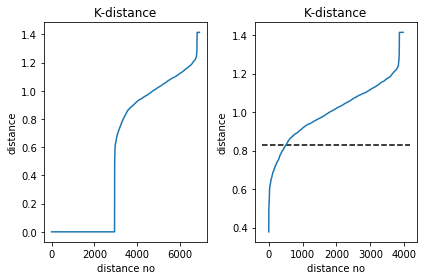

In [16]:
plotter = Plotter()
eps = plotter.plot_k_distance(tf_idf_review_bodys, k=5)

In [17]:
min_samples_val = 6

In [25]:
db_res = perform_db_scan(tf_idf_review_bodys, min_samples_val, eps)


<----- Db Scan Starts ----->
Eps: 0.83  Min_samples: 6
Estimated number of clusters: 122
Estimated number of noise points: 4574
Silhouette Coefficient: 0.209


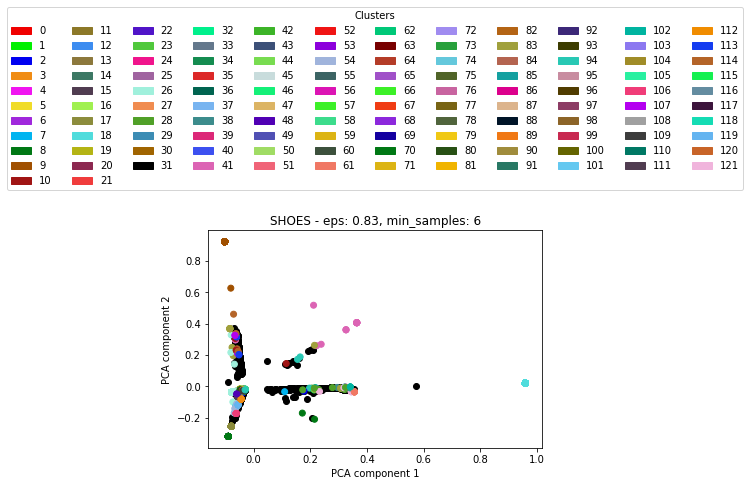

In [26]:
plot_db_scan(db_res, tf_idf_review_bodys, min_samples_val, eps, dataset_name)

In [28]:
cluster_objects_and_opinions = extract_results(db_res.labels_, original_review_bodys, cleaned_review_bodys)

Counter({-1: 4574, 18: 201, 9: 118, 26: 104, 8: 97, 3: 84, 15: 63, 7: 57, 17: 55, 48: 54, 16: 49, 1: 40, 40: 39, 80: 39, 36: 35, 79: 35, 33: 33, 11: 32, 27: 31, 13: 29, 43: 26, 70: 25, 10: 24, 77: 23, 84: 23, 60: 22, 83: 21, 29: 21, 19: 20, 47: 20, 5: 19, 22: 19, 41: 19, 58: 19, 64: 19, 20: 18, 65: 18, 74: 18, 35: 17, 39: 17, 2: 16, 94: 16, 37: 16, 90: 16, 44: 14, 68: 14, 4: 13, 28: 13, 34: 13, 92: 13, 30: 12, 50: 12, 104: 12, 12: 11, 14: 11, 21: 11, 59: 11, 62: 11, 81: 11, 106: 11, 23: 10, 31: 10, 38: 10, 88: 10, 51: 10, 54: 10, 56: 10, 69: 10, 117: 10, 72: 10, 109: 10, 111: 10, 24: 9, 32: 9, 55: 9, 76: 9, 85: 9, 95: 9, 0: 8, 25: 8, 110: 8, 53: 8, 82: 8, 86: 8, 87: 8, 108: 8, 93: 7, 42: 7, 45: 7, 46: 7, 49: 7, 57: 7, 61: 7, 63: 7, 71: 7, 73: 7, 75: 7, 78: 7, 98: 7, 99: 7, 102: 7, 103: 7, 114: 7, 6: 6, 52: 6, 66: 6, 67: 6, 89: 6, 91: 6, 96: 6, 97: 6, 100: 6, 112: 6, 101: 6, 113: 6, 105: 6, 107: 6, 116: 6, 121: 6, 118: 6, 119: 6, 120: 6, 115: 5})
0 ----
>>> Cleaned review -> back
Match 

>>> Review sentence -> I am extremely disappointed in this product. 

>>> Cleaned review -> product
>>> Review sentence -> I do not recommend this product. 

>>> Cleaned review -> product
>>> Review sentence -> I can no longer recommend this product. 

>>> Cleaned review -> product
Match :  Very disappointing
Match :  other experiences
>>> Review sentence -> Very disappointing and from what I see in other experiences Asolo doesn't stand behind their product. 

>>> Cleaned review -> product
Match :  VERY UNHAPPY
>>> Review sentence -> VERY UNHAPPY with the product! 

>>> Cleaned review -> product
Match :  really disappointed
>>> Review sentence -> I'm really disappointed with this product. 

>>> Cleaned review -> product
Match :  Fake product
>>> Review sentence -> Fake product. 

>>> Cleaned review -> product
>>> Review sentence -> the worst product i bought on amazon. 

>>> Cleaned review -> product
Match :  didn't
>>> Review sentence -> I didn't like the product. 

>>> Cleaned review

>>> Cleaned review -> pair
Match :  creaking is horrible
Match :  other pair
>>> Review sentence -> The creaking is horrible and they are definitely lighter than my other pair. 

>>> Cleaned review -> pair
Match :  third pair
>>> Review sentence -> I hate to return these and take my chances with a third pair that might be even worse. 

8 ----
>>> Cleaned review -> waste money
>>> Review sentence -> Waste of money. 

>>> Cleaned review -> waste money
Match :  Total waste
>>> Review sentence -> Total waste of money! 

>>> Cleaned review -> waste money
>>> Review sentence -> What a waste of money. 

>>> Cleaned review -> waste money
>>> Review sentence -> Waste of money. 

>>> Cleaned review -> waste money
>>> Review sentence -> What a waste of money. 

>>> Cleaned review -> waste money
>>> Review sentence -> Waste of money. 

>>> Cleaned review -> waste money
Match :  complete waste
>>> Review sentence -> A complete waste of money. 

>>> Cleaned review -> waste money
>>> Review sentence 

Match :  Very pretty
Match :  Very pretty shoe
Match :  pretty shoe
>>> Review sentence -> Very pretty shoe but killed by feet. 

>>> Cleaned review -> shoe
Match :  miserably uncomfortable
>>> Review sentence -> For me this shoe is miserably uncomfortable. 

>>> Cleaned review -> shoe
Match :  Terrible shoe
>>> Review sentence -> Terrible shoe. 

>>> Cleaned review -> shoe
Match :  Very thick
Match :  Very thick shoe
Match :  thick shoe
Match :  very uncomfortable
>>> Review sentence -> Very thick shoe, very uncomfortable. 

>>> Cleaned review -> shoe
Match :  Very uncomfortable
Match :  Very uncomfortable shoe
Match :  uncomfortable shoe
>>> Review sentence -> Very uncomfortable shoe. 

>>> Cleaned review -> shoe
Match :  so ugly
>>> Review sentence -> This shoe is so ugly. 

>>> Cleaned review -> shoe
>>> Review sentence -> Looks nice but shoe cannot fit. 

>>> Cleaned review -> shoe
Match :  so disappointed
>>> Review sentence -> This shoe was cute  and I am so disappointed. 

>>> 

>>> Review sentence -> I regret buying these and they don't get any wear. 

>>> Cleaned review -> wear
>>> Review sentence -> They broke within only one wear. 

>>> Cleaned review -> wear
Match :  Limited wear
>>> Review sentence -> Limited wear. 

13 ----
>>> Cleaned review -> problem
Match :  never got
>>> Review sentence -> Problem is that it never got used. 

>>> Cleaned review -> problem
>>> Review sentence -> <br /><br />No problem  with shipping it was fast. 

>>> Cleaned review -> problem
Match :  owned zoot
>>> Review sentence -> I have owned zoot shoes before with no problem but these were horrible. 

>>> Cleaned review -> problem
Match :  Same problem
>>> Review sentence -> Same problem. 

>>> Cleaned review -> problem
Match :  real problem
>>> Review sentence -> The real problem arose when it got hot. 

>>> Cleaned review -> problem
Match :  never come
>>> Review sentence -> I have never come across this problem. 

>>> Cleaned review -> problem
>>> Review sentence -> The pr

>>> Review sentence -> Disappointed in the fit. 

>>> Cleaned review -> fit
Match :  overall fit
>>> Review sentence -> Poor overall fit. 

>>> Cleaned review -> fit
Match :  Didn't
Match :  narrow feet
>>> Review sentence -> Didn't fit my narrow feet too well. 

>>> Cleaned review -> fit
Match :  good fit
>>> Review sentence -> Not a good fit. 

>>> Cleaned review -> fit
>>> Review sentence -> Poor fit. 

>>> Cleaned review -> fit
Match :  didnt
>>> Review sentence -> It didnt fit! 

>>> Cleaned review -> fit
Match :  Terrible fit
>>> Review sentence -> Terrible fit. 

>>> Cleaned review -> fit
>>> Review sentence -> Also, if your ankles are even a little large the straps won't fit. 

>>> Cleaned review -> fit
Match :  good fit
>>> Review sentence -> It is not a good fit. 

>>> Cleaned review -> fit
Match :  very poor
Match :  very poor fit
>>> Review sentence -> Defwctive, very poor fit. 

>>> Cleaned review -> fit
Match :  Awful fit
>>> Review sentence -> Awful fit. 

>>> Cleaned re

Match :  poor quality
>>> Review sentence -> Very poor quality. 

>>> Cleaned review -> quality
Match :  nice shoes
Match :  bad quality
>>> Review sentence -> nery nice shoes but bad quality. 

>>> Cleaned review -> quality
Match :  Very poor
Match :  Very poor quality
Match :  poor quality
>>> Review sentence -> Very poor quality. 

>>> Cleaned review -> quality
Match :  horrible quality
>>> Review sentence -> What horrible quality! 

>>> Cleaned review -> quality
Match :  Bad quality
>>> Review sentence -> Bad quality! 

>>> Cleaned review -> quality
>>> Review sentence -> Based on the quality, I would have expected to pay $10. 

>>> Cleaned review -> quality
Match :  Poor quality
>>> Review sentence -> Poor quality. 

>>> Cleaned review -> quality
Match :  Horrible quality
>>> Review sentence -> Horrible quality and they wouldn't let me return it. 

>>> Cleaned review -> quality
Match :  Very low
Match :  Very low quality
Match :  low quality
Match :  very cheap
>>> Review sentence

>>> Review sentence -> The quality of the sunglasses themselves is terrible. 

>>> Cleaned review -> quality
Match :  really disappointed
>>> Review sentence -> I am really disappointed in the quality of these shoes. 

>>> Cleaned review -> quality
Match :  Very poor
Match :  Very poor quality
Match :  poor quality
>>> Review sentence -> Very poor quality. 

19 ----
>>> Cleaned review -> foot foot
Match :  Left foot
Match :  foot fits good
Match :  right foot
Match :  not so good
Match :  so good
>>> Review sentence -> Left foot fits good, right foot not so good. 

>>> Cleaned review -> thing foot foot
Match :  Weird thing
Match :  left foot
Match :  right foot
>>> Review sentence -> Weird thing is that my left foot is a little bigger than my right foot. 

>>> Cleaned review -> foot
Match :  hallux valgus
>>> Review sentence -> Don't buy them if you have  bunions (hallux valgus) :( My foot is 10. 

>>> Cleaned review -> foot
Match :  were too
Match :  too small
>>> Review sentence -> S

>>> Cleaned review -> day competition size size size
Match :  same day
Match :  wrong size
Match :  ordered almost
>>> Review sentence -> When they arrived (the same day I left for a competition), they were the wrong size (size 8 and I ordered almost 2 sizes larger! 

>>> Cleaned review -> size
Match :  wrong size
>>> Review sentence -> It's the wrong size. 

>>> Cleaned review -> color size size
Match :  Nice color
Match :  narrow size
>>> Review sentence -> Nice color and casual but unfortunately size for both 11 1/2  half And/or 12 with narrow size. 

>>> Cleaned review -> size
Match :  wide size
>>> Review sentence -> Would not recommend for girls that need a wide size. 

>>> Cleaned review -> size
Match :  Not true
>>> Review sentence -> Not true to size at all. 

>>> Cleaned review -> size
Match :  were not
Match :  not true
>>> Review sentence -> Plus they were not true to the size. 

>>> Cleaned review -> size shoe
>>> Review sentence -> Does not fit like the size labeled on th

>>> Review sentence -> They are no better than flip flops with straps, and the straps are really cheesy. 

>>> Cleaned review -> flip
Match :  very loose
Match :  very loose flip
Match :  loose flip
Match :  loose flip flops
>>> Review sentence -> I feel like I'm wearing very loose flip flops. 

>>> Cleaned review -> flip
Match :  flip flops
Match :  too small
>>> Review sentence -> The straps on these flip flops are too small! 

>>> Cleaned review -> flip
Match :  vionic flip
Match :  vionic flip flops
Match :  didn't
>>> Review sentence -> I like vionic flip flops and was disappointed when they didn't fit, but will continue buying them. 

>>> Cleaned review -> flip
Match :  flip flops
>>> Review sentence -> These flip flops are so much bigger than I would have expected that they are unwearable. 

>>> Cleaned review -> flip
Match :  Terrible flip
Match :  Terrible flip flops
>>> Review sentence -> Terrible flip flops. 

>>> Cleaned review -> flip
Match :  flip flops
>>> Review sentenc

>>> Review sentence -> To lower the price from 100 to 75? 

>>> Cleaned review -> price
Match :  ever tried
>>> Review sentence -> These are easily the worst sunglasses I have ever tried at any price. 

37 ----
>>> Cleaned review -> purse
Match :  FAKE PURSE
>>> Review sentence -> THIS IS A FAKE PURSE! 

>>> Cleaned review -> purse
Match :  well made
>>> Review sentence -> Cute purse, but not well made. 

>>> Cleaned review -> purse
>>> Review sentence -> Your purse was fake. 

>>> Cleaned review -> purse
Match :  fake purse
>>> Review sentence -> it's fake purse. 

>>> Cleaned review -> purse
Match :  Did not
>>> Review sentence -> Did not like this purse. 

>>> Cleaned review -> strap purse
Match :  purse is awful
>>> Review sentence -> The strap on this purse is awful. 

>>> Cleaned review -> purse
Match :  Very disappointed
>>> Review sentence -> Very disappointed with this purse! 

>>> Cleaned review -> purse strap purse
Match :  new purse
>>> Review sentence -> I exchanged the pu

Match :  n't good
>>> Review sentence -> The design isn't good. 

>>> Cleaned review -> design
Match :  Quite disappointed
>>> Review sentence -> Quite disappointed as I really like the design. 

>>> Cleaned review -> design
Match :  Bad design
>>> Review sentence -> Bad design. 

>>> Cleaned review -> design
Match :  bad design
>>> Review sentence -> Just a bad design. 

>>> Cleaned review -> design
>>> Review sentence -> <br />awful design! 

>>> Cleaned review -> design
Match :  Defective design
>>> Review sentence -> Defective design! 

>>> Cleaned review -> design
Match :  Bad design
>>> Review sentence -> Bad design. 

>>> Cleaned review -> design
Match :  really annoying
>>> Review sentence -> the design touch my toes nails and get stuck in them sometime, really annoying. 

>>> Cleaned review -> design
Match :  ever purchased
>>> Review sentence -> Maybe they changed their design or whatever but these are hands down, the worst shoes I've ever purchased. 

>>> Cleaned review -> d

>>> Cleaned review -> sole
Match :  already worn
>>> Review sentence -> Sole is already worn down. 

51 ----
>>> Cleaned review -> broken
>>> Review sentence -> This shoes broken in meadle. 

>>> Cleaned review -> broken
>>> Review sentence -> Arrived broken. 

>>> Cleaned review -> broken
>>> Review sentence -> Came broken. 

>>> Cleaned review -> broken
>>> Review sentence -> BROKEN! 

>>> Cleaned review -> broken
>>> Review sentence -> Arrived broken. 

>>> Cleaned review -> broken
Match :  too small
>>> Review sentence -> Arrived broken and too small. 

>>> Cleaned review -> broken
>>> Review sentence -> ziper broken. 

>>> Cleaned review -> broken
Match :  sent back
>>> Review sentence -> Broken when received, sent back. 

>>> Cleaned review -> broken
>>> Review sentence -> Arrived broken. 

>>> Cleaned review -> broken
>>> Review sentence -> Came broken. 

52 ----
>>> Cleaned review -> construction
Match :  very poor
>>> Review sentence -> The construction seems very poor. 

>>> 

>>> Review sentence -> Wrong shoes I order 10. 

>>> Cleaned review -> order
Match :  Wasn't
Match :  n't happy
>>> Review sentence -> Wasn't happy with this order. 

>>> Cleaned review -> order
Match :  Not sure
Match :  flip flops
Match :  now too small
Match :  too small
>>> Review sentence -> Not sure what's going on with teva, but all flip flops I order are now too small and narrow. 

>>> Cleaned review -> order
Match :  Very upset
>>> Review sentence -> Very upset when i recieved my order. 

>>> Cleaned review -> order
>>> Review sentence -> I am upset with the order ! 

64 ----
>>> Cleaned review -> item
Match :  ever bought
>>> Review sentence -> Worst item I've ever bought on Amazon. 

>>> Cleaned review -> item
Match :  ever ordered
>>> Review sentence -> Absolutely the worst item I've ever ordered on Amazon. 

>>> Cleaned review -> item
Match :  was totally
Match :  totally disappointed
>>> Review sentence -> I was totally disappointed with this item. 

>>> Cleaned review ->

>>> Review sentence -> Unfortunately, I can't return since I wore them already. 

>>> Cleaned review -> return
Match :  not helpful
Match :  simple return
>>> Review sentence -> They are not helpful (even on a simple return). 

74 ----
>>> Cleaned review -> heel
Match :  heel is dirty
>>> Review sentence -> Looks used, each heel is dirty. 

>>> Cleaned review -> heel
Match :  too long
>>> Review sentence -> The straps at your heel are defective and are too long. 

>>> Cleaned review -> heel
Match :  did not
>>> Review sentence -> Unfortunately these heel tips did not work. 

>>> Cleaned review -> heel
>>> Review sentence -> I hate that my feet can no longer the heel and I feel like I am going to fall out. 

>>> Cleaned review -> heel
Match :  Very cute
Match :  didn't
>>> Review sentence -> Very cute, but the heel felt wobbly and insecure, so I didn't feel comfortable or safe in them. 

>>> Cleaned review -> heel
Match :  cheaply made
Match :  solid heel
>>> Review sentence -> They are

>>> Review sentence -> Flaws in both lenses makes these useless. 

>>> Cleaned review -> useless
Match :  Too small
Match :  useless zippers
>>> Review sentence -> Too small, useless zippers. 

>>> Cleaned review -> useless
>>> Review sentence -> Useless, would not recommend! 

>>> Cleaned review -> useless
Match :  Just useless
>>> Review sentence -> Just useless. 

>>> Cleaned review -> useless
>>> Review sentence -> These are useless for me and are going back! 

>>> Cleaned review -> useless
>>> Review sentence -> useless for me. 

>>> Cleaned review -> useless
>>> Review sentence -> Useless . 

>>> Cleaned review -> useless
>>> Review sentence -> USELESS. 

83 ----
>>> Cleaned review -> quality size
Match :  Bad quality
Match :  really big
>>> Review sentence -> Bad quality ans size z really big. 

>>> Cleaned review -> quality size
>>> Review sentence -> Disappointed with both the quality and the size. 

>>> Cleaned review -> size fit
Match :  was very
Match :  very disappointed
M

>>> Review sentence -> I would not recommend them and would not repurchase this brand again. 

93 ----
>>> Cleaned review -> money pair flip flop
Match :  Very disappointed
>>> Review sentence -> Very disappointed to have wasted my money on a pair of flip-flop that I can't really wear. 

>>> Cleaned review -> flip flop size
Match :  flip flop
Match :  flip flop sneakers
>>> Review sentence -> I need to exchange the flip flop sneakers for a larger size. 

>>> Cleaned review -> flip flop
Match :  expensive flip
Match :  expensive flip flop
Match :  did not
Match :  totally disappointed
>>> Review sentence -> Being such an expensive flip flop I did not expect that & am totally disappointed with them. 

>>> Cleaned review -> flip flop
Match :  flip flop
>>> Review sentence -> 17, 2016:  I bought this flip flop In Aug. 

>>> Cleaned review -> flip flop
Match :  flip flop
Match :  only started
>>> Review sentence -> I kept this flip flop for a while and only started using it in July 2016. 



>>> Review sentence -> I tried  them for two week but first  my legs  and feet were  tired  and sore. 

>>> Cleaned review -> week
>>> Review sentence -> One of the handles started falling apart after a week. 

>>> Cleaned review -> week
>>> Review sentence -> And broke in a week! 

>>> Cleaned review -> week
>>> Review sentence -> They broke within a week of having them. 

>>> Cleaned review -> week
>>> Review sentence -> They broke after a week. 

>>> Cleaned review -> week
>>> Review sentence -> Got ruined one week later. 

>>> Cleaned review -> week
Match :  first week
Match :  were not
Match :  so bad
>>> Review sentence -> I wore them the first week and decided they were not for me because they hurt my feet so bad. 

>>> Cleaned review -> week
Match :  were too
Match :  too loose
>>> Review sentence -> Seemed fine initially, and, within a week, the sandals were too loose. 

110 ----
>>> Cleaned review -> nothing picture ad
>>> Review sentence -> They look nothing like the picture

Opinion word:  Terrible 

{'customer': [('Poor', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}, 'Poor customer', 'Poor customer service.'), ('Poor', {'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'compound': -0.4767}, 'Poor customer service', 'Poor customer service.'), ('poor', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}, 'poor customer', 'Poor craftsmanship and poor customer service.'), ('poor', {'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'compound': -0.4767}, 'poor customer service', 'Poor craftsmanship and poor customer service.'), ('Bad', {'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423}, 'Bad customer', "Bad customer service won't let me trade."), ('Bad', {'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}, 'Bad customer service', "Bad customer service won't let me trade."), ('horrible', {'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423}, 'horrible customer', 'Horrible product and horrible customer service.'), ('horrible', 

{'waste': [('Total', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4754}, 'Total waste', 'Total waste of money!'), ('complete', {'neg': 0.737, 'neu': 0.263, 'pos': 0.0, 'compound': -0.4215}, 'complete waste', 'A complete waste of money.'), ('total', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4754}, 'total waste', 'A total waste of money.'), ('total', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4754}, 'total waste', 'It was a total waste of my money.'), ('Complete', {'neg': 0.737, 'neu': 0.263, 'pos': 0.0, 'compound': -0.4215}, 'Complete waste', 'Complete waste of money.'), ('Complete', {'neg': 0.737, 'neu': 0.263, 'pos': 0.0, 'compound': -0.4215}, 'Complete waste', 'Complete waste of money and extremely cheap-looking.'), ('Total', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4754}, 'Total waste', 'Total waste of money!'), ('Total', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4754}, 'Total waste', 'Total waste of money.'), ('Tota

Pattern Match Found ->  major problem [{'TAG': 'JJ'}, {'TAG': 'NN'}]
Opinion word:  major 

Pattern Match Found ->  Same problem [{'TAG': 'JJ'}, {'TAG': 'NN'}]
Opinion word:  Same 

Pattern Match Found ->  real problem [{'TAG': 'JJ'}, {'TAG': 'NN'}]
Opinion word:  real 

{'problem': [('Same', {'neg': 0.73, 'neu': 0.27, 'pos': 0.0, 'compound': -0.4019}, 'Same problem', 'Same problem.'), ('real', {'neg': 0.73, 'neu': 0.27, 'pos': 0.0, 'compound': -0.4019}, 'real problem', 'The real problem arose when it got hot.'), ('had', {'neg': 0.73, 'neu': 0.27, 'pos': 0.0, 'compound': -0.4019}, 'had problem', 'After a few months had problem with the soled heels.'), ('1st', {'neg': 0.73, 'neu': 0.27, 'pos': 0.0, 'compound': -0.4019}, '1st problem', "It came damaged this is the 1st problem I've had with bearpaws ."), ('BIG', {'neg': 0.73, 'neu': 0.27, 'pos': 0.0, 'compound': -0.4019}, 'BIG problem', 'The BIG problem is that I have had them for about four months now and they are falling apart.'), ('maj

Pattern Match Found ->  Very low quality [{'TAG': 'RB'}, {'TAG': 'JJ'}, {'TAG': 'NN'}]
Opinion word:  Very low 

Pattern Match Found ->  low quality [{'TAG': 'JJ'}, {'TAG': 'NN'}]
Opinion word:  low 

Pattern Match Found ->  Very poor quality [{'TAG': 'RB'}, {'TAG': 'JJ'}, {'TAG': 'NN'}]
Opinion word:  Very poor 

Pattern Match Found ->  poor quality [{'TAG': 'JJ'}, {'TAG': 'NN'}]
Opinion word:  poor 

Pattern Match Found ->  Poor quality [{'TAG': 'JJ'}, {'TAG': 'NN'}]
Opinion word:  Poor 

Pattern Match Found ->  Very poor quality [{'TAG': 'RB'}, {'TAG': 'JJ'}, {'TAG': 'NN'}]
Opinion word:  Very poor 

Pattern Match Found ->  poor quality [{'TAG': 'JJ'}, {'TAG': 'NN'}]
Opinion word:  poor 

Pattern Match Found ->  quality is low [{'TAG': 'NN'}, {'TAG': 'VBZ'}, {'TAG': 'JJ'}]
Opinion word:  low 

Pattern Match Found ->  bad quality [{'TAG': 'JJ'}, {'TAG': 'NN'}]
Opinion word:  bad 

Pattern Match Found ->  Poor quality [{'TAG': 'JJ'}, {'TAG': 'NN'}]
Opinion word:  Poor 

Pattern Match 

{'quality': [('Horrible', {'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423}, 'Horrible quality', 'Horrible quality.'), ('Not great', {'neg': 0.622, 'neu': 0.378, 'pos': 0.0, 'compound': -0.5096}, 'Not great quality', 'Not great quality.'), ('Poor', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}, 'Poor quality', 'Poor quality.'), ('Very poor', {'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.5256}, 'Very poor quality', 'Very poor quality.'), ('poor', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}, 'poor quality', 'Very poor quality.'), ('Poor', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}, 'Poor quality', 'Poor quality.'), ('bad', {'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423}, 'bad quality', 'bad quality,it is terrible.'), ('poor', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}, 'poor quality', 'TOO expensive for the poor quality.'), ('Poor', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compoun




Cluster  19 : 
>>> Most occuring words :  [('foot', 24)]
Pattern Match Found ->  right foot NO [{'TAG': 'JJ'}, {'TAG': 'NN'}, {'TAG': 'NN'}]
Opinion word:  right 

{'foot': [('right', {'neg': 0.595, 'neu': 0.405, 'pos': 0.0, 'compound': -0.4466}, 'right foot NO', 'The left foot is OK (1 US or 32 EUR), but the right foot NO (12 US or 28 EUR).')]}



Cluster  20 : 
>>> Most occuring words :  [('crap', 19)]
Pattern Match Found ->  Total crap [{'TAG': 'JJ'}, {'TAG': 'NN'}]
Opinion word:  Total 

Pattern Match Found ->  cheap crap [{'TAG': 'JJ'}, {'TAG': 'NN'}]
Opinion word:  cheap 

Pattern Match Found ->  complete crap [{'TAG': 'JJ'}, {'TAG': 'NN'}]
Opinion word:  complete 

Pattern Match Found ->  complete crap [{'TAG': 'JJ'}, {'TAG': 'NN'}]
Opinion word:  complete 

{'crap': [('Total', {'neg': 0.743, 'neu': 0.257, 'pos': 0.0, 'compound': -0.4391}, 'Total crap', 'Total crap, fell apart in less than 2 months.'), ('cheap', {'neg': 0.722, 'neu': 0.278, 'pos': 0.0, 'compound': -0.3818}, '

{'disappointment': [('Big', {'neg': 0.767, 'neu': 0.233, 'pos': 0.0, 'compound': -0.5106}, 'Big disappointment', 'Big disappointment.'), ('Huge', {'neg': 0.589, 'neu': 0.0, 'pos': 0.411, 'compound': -0.25}, 'Huge disappointment', 'Huge disappointment and not sure what to do.'), ('Major', {'neg': 0.782, 'neu': 0.218, 'pos': 0.0, 'compound': -0.5563}, 'Major disappointment', 'Major disappointment.'), ('real', {'neg': 0.767, 'neu': 0.233, 'pos': 0.0, 'compound': -0.5106}, 'real disappointment', 'A real disappointment.'), ('complete', {'neg': 0.767, 'neu': 0.233, 'pos': 0.0, 'compound': -0.5106}, 'complete disappointment', 'A complete disappointment.'), ('big', {'neg': 0.767, 'neu': 0.233, 'pos': 0.0, 'compound': -0.5106}, 'big disappointment', 'These shoes were a big disappointment.'), ('Huge', {'neg': 0.589, 'neu': 0.0, 'pos': 0.411, 'compound': -0.25}, 'Huge disappointment', 'Huge disappointment, and unfortunately, too late to return.'), ('extreme', {'neg': 0.782, 'neu': 0.218, 'pos': 0

Pattern Match Found ->  Really low quality [{'TAG': 'RB'}, {'TAG': 'JJ'}, {'TAG': 'NN'}]
Opinion word:  Really low 

Pattern Match Found ->  low quality [{'TAG': 'JJ'}, {'TAG': 'NN'}]
Opinion word:  low 

Pattern Match Found ->  Poor quality [{'TAG': 'JJ'}, {'TAG': 'NN'}]
Opinion word:  Poor 

Pattern Match Found ->  not good quality [{'TAG': 'RB'}, {'TAG': 'JJ'}, {'TAG': 'NN'}]
Opinion word:  not good 

Pattern Match Found ->  very poor quality [{'TAG': 'RB'}, {'TAG': 'JJ'}, {'TAG': 'NN'}]
Opinion word:  very poor 

Pattern Match Found ->  poor quality [{'TAG': 'JJ'}, {'TAG': 'NN'}]
Opinion word:  poor 

Pattern Match Found ->  Very bad quality [{'TAG': 'RB'}, {'TAG': 'JJ'}, {'TAG': 'NN'}]
Opinion word:  Very bad 

Pattern Match Found ->  bad quality [{'TAG': 'JJ'}, {'TAG': 'NN'}]
Opinion word:  bad 

{'quality': [('Really low', {'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.3384}, 'Really low quality', 'Really low quality for the price.'), ('low', {'neg': 0.677, 'neu': 0.323

{'material': [('Bad', {'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423}, 'Bad material', 'Bad material .'), ('Poor', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}, 'Poor material', 'Poor material.'), ('poor', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}, 'poor material', 'poor material was used to made this.'), ('yucky', {'neg': 0.583, 'neu': 0.417, 'pos': 0.0, 'compound': -0.4215}, 'material is yucky', "the material is yucky looking and it's really big and awkward looking."), ('poor', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}, 'poor material', 'Made of poor material.')]}



Cluster  59 : 
>>> Most occuring words :  [('month', 11)]
{'month': []}



Cluster  60 : 
>>> Most occuring words :  [('hurt', 22)]
Pattern Match Found ->  hurt terribly [{'TAG': 'VBD'}, {'TAG': 'RB'}]
Pattern Match Found ->  hurt so [{'TAG': 'VBD'}, {'TAG': 'RB'}]
Pattern Match Found ->  hurt as [{'TAG': 'VBD'}, {'TAG': 'RB'}]
Pattern Match Found -> 

Pattern Match Found ->  disappointed customer [{'TAG': 'JJ'}, {'TAG': 'NN'}]
Opinion word:  disappointed 

{'customer': [('Very unsatisfied', {'neg': 0.599, 'neu': 0.401, 'pos': 0.0, 'compound': -0.4576}, 'Very unsatisfied customer', 'A Very unsatisfied customer.'), ('unsatisfied', {'neg': 0.73, 'neu': 0.27, 'pos': 0.0, 'compound': -0.4019}, 'unsatisfied customer', 'A Very unsatisfied customer.'), ('Unsatisfied', {'neg': 0.73, 'neu': 0.27, 'pos': 0.0, 'compound': -0.4019}, 'Unsatisfied customer', 'Unsatisfied customer.'), ('Extremely disappointed', {'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.5256}, 'Extremely disappointed customer', 'Extremely disappointed customer.'), ('disappointed', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}, 'disappointed customer', 'Extremely disappointed customer.')]}



Cluster  87 : 
>>> Most occuring words :  [('zipper', 8)]
Pattern Match Found ->  broken zipper [{'TAG': 'VBN'}, {'TAG': 'NN'}]
Opinion word:  broken 

{'zipper': [

{'experience': [('Horrible', {'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423}, 'Horrible experience', 'Horrible experience.'), ('Horrible', {'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423}, 'Horrible experience', 'Horrible experience.'), ('very painful', {'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'compound': -0.4927}, 'very painful experience', 'It would have been a very painful experience to actually wear these shoes so back they go.'), ('painful', {'neg': 0.744, 'neu': 0.256, 'pos': 0.0, 'compound': -0.4404}, 'painful experience', 'It would have been a very painful experience to actually wear these shoes so back they go.'), ('horrible', {'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423}, 'horrible experience', 'This is horrible experience.'), ('Very disappointing', {'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5413}, 'Very disappointing experience', 'Very disappointing experience.'), ('disappointing', {'neg': 0.762, 'neu': 0.238, 'pos': 0.

In [29]:
print_results(cluster_objects_and_opinions )

<<< Extracted Objects and Opinions >>>

>>> Cluster  0 <<<
--  back :  []

>>> Cluster  1 <<<
--  day :  []

>>> Cluster  2 <<<
--  customer :  [('Poor', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}, 'Poor customer', 'Poor customer service.'), ('Poor', {'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'compound': -0.4767}, 'Poor customer service', 'Poor customer service.'), ('poor', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}, 'poor customer', 'Poor craftsmanship and poor customer service.'), ('poor', {'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'compound': -0.4767}, 'poor customer service', 'Poor craftsmanship and poor customer service.'), ('Bad', {'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423}, 'Bad customer', "Bad customer service won't let me trade."), ('Bad', {'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}, 'Bad customer service', "Bad customer service won't let me trade."), ('horrible', {'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'co

--  shoe :  [('hard', {'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.1027}, 'shoe is hard', 'The shoe is hard to bend making it impossible to walk.'), ('horrible', {'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423}, 'horrible shoe', 'Horrible, horrible shoe!'), ('all.completely wrong', {'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'compound': -0.4767}, 'all.completely wrong shoe', 'Did not fit at all.completely wrong shoe.'), ('wrong', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}, 'wrong shoe', 'Did not fit at all.completely wrong shoe.'), ('worn', {'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'compound': -0.296}, 'worn shoe', 'I wonder if they will let me return a worn shoe.'), ('most uncomfortable', {'neg': 0.591, 'neu': 0.409, 'pos': 0.0, 'compound': -0.4391}, 'most uncomfortable shoe', 'the most uncomfortable shoe I have ever worn.'), ('uncomfortable', {'neg': 0.722, 'neu': 0.278, 'pos': 0.0, 'compound': -0.3818}, 'uncomfortable shoe', 'the most uncomfort

--  quality :  [('Horrible', {'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423}, 'Horrible quality', 'Horrible quality.'), ('Not great', {'neg': 0.622, 'neu': 0.378, 'pos': 0.0, 'compound': -0.5096}, 'Not great quality', 'Not great quality.'), ('Poor', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}, 'Poor quality', 'Poor quality.'), ('Very poor', {'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.5256}, 'Very poor quality', 'Very poor quality.'), ('poor', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}, 'poor quality', 'Very poor quality.'), ('Poor', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}, 'Poor quality', 'Poor quality.'), ('bad', {'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423}, 'bad quality', 'bad quality,it is terrible.'), ('poor', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}, 'poor quality', 'TOO expensive for the poor quality.'), ('Poor', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'comp


>>> Cluster  19 <<<
--  foot :  [('right', {'neg': 0.595, 'neu': 0.405, 'pos': 0.0, 'compound': -0.4466}, 'right foot NO', 'The left foot is OK (1 US or 32 EUR), but the right foot NO (12 US or 28 EUR).')]

>>> Cluster  20 <<<
--  crap :  [('Total', {'neg': 0.743, 'neu': 0.257, 'pos': 0.0, 'compound': -0.4391}, 'Total crap', 'Total crap, fell apart in less than 2 months.'), ('cheap', {'neg': 0.722, 'neu': 0.278, 'pos': 0.0, 'compound': -0.3818}, 'cheap crap', 'The top is already ripped on this cheap crap.'), ('complete', {'neg': 0.722, 'neu': 0.278, 'pos': 0.0, 'compound': -0.3818}, 'complete crap', 'They are complete crap.'), ('complete', {'neg': 0.722, 'neu': 0.278, 'pos': 0.0, 'compound': -0.3818}, 'complete crap', 'These are complete crap.')]

>>> Cluster  21 <<<
--  sad :  []

>>> Cluster  22 <<<
--  mistake :  [('sad', {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.6705}, 'sad mistake', 'That was a sad mistake.'), ('Huge', {'neg': 0.511, 'neu': 0.0, 'pos': 0.489, 'compound'

--  day :  []

>>> Cluster  35 <<<
--  color :  [('Wrong', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}, 'Wrong color', 'Wrong color lense.'), ('Wrong', {'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'compound': -0.4767}, 'Wrong color lense', 'Wrong color lense.'), ('ugly', {'neg': 0.623, 'neu': 0.377, 'pos': 0.0, 'compound': -0.5106}, 'color is ugly', 'Too boxy and up close, the color is ugly.'), ('wrong', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}, 'wrong color', 'Received the wrong color.'), ('wrong', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}, 'wrong color', 'wrong color.'), ('wrong', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}, 'wrong color', 'In the wrong color.'), ('Wrong', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}, 'Wrong color', 'Wrong color also.')]

>>> Cluster  36 <<<
--  price :  [('very low', {'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.3384}, 'very low price', 'Not worth eve

--  policy :  [('terrible', {'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'compound': -0.4767}, 'terrible return policy', 'terrible return policy!'), ('weak', {'neg': 0.592, 'neu': 0.408, 'pos': 0.0, 'compound': -0.4404}, 'weak return policy', "<br /><br />Unfortunately, Amazon has a weak return policy so I'm going to just get some more glue.")]

>>> Cluster  73 <<<
--  return :  []

>>> Cluster  74 <<<
--  heel :  [('dirty', {'neg': 0.592, 'neu': 0.408, 'pos': 0.0, 'compound': -0.4404}, 'heel is dirty', 'Looks used, each heel is dirty.'), ('uncomfortable', {'neg': 0.722, 'neu': 0.278, 'pos': 0.0, 'compound': -0.3818}, 'uncomfortable heel', 'Too big and uncomfortable heel (too hard).'), ('wrong', {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}, 'wrong heel', 'Very disappointed received with the wrong heel.')]

>>> Cluster  75 <<<
--  ankle :  []

>>> Cluster  76 <<<
--  guess :  []

>>> Cluster  77 <<<
--  bag :  [('bad', {'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0

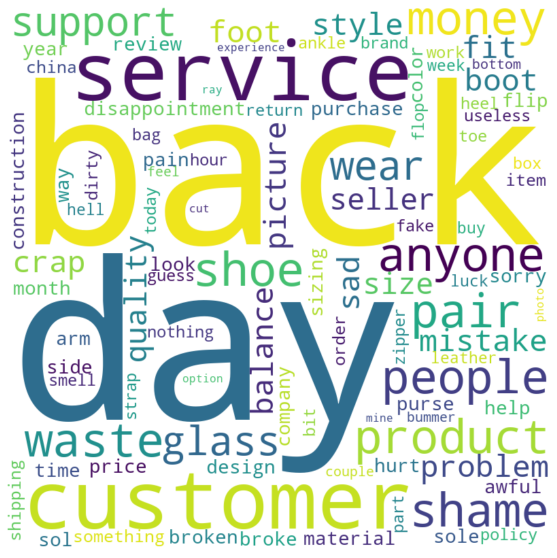

In [34]:
objects, adjectives= stringify_results(cluster_objects_and_opinions)

plot_wordcloud(objects) 


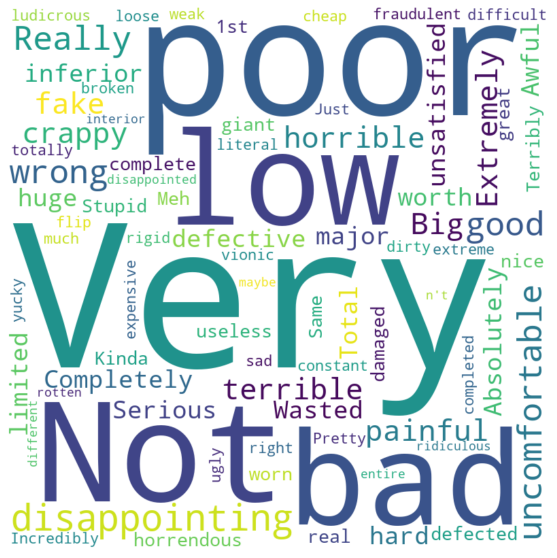

In [36]:
plot_wordcloud(adjectives)

In [39]:
def write_to_excel(objects_opinions):
    import xlwt 
    from xlwt import Workbook 
      
    # Workbook is created 
    wb = Workbook() 
      
    # add_sheet is used to create sheet. 
    sheet1 = wb.add_sheet('Sheet 1') 
      
    
    row = 1
    
    for cluster_id, object_op in enumerate(objects_opinions):
    
        for ob, ops in object_op.items():
            
            if len(ops) < 1:
                sheet1.write(row, 0, cluster_id)
                sheet1.write(row, 1, ob)
                row += 1
                continue
                
            for op in ops:
                sheet1.write(row, 0, cluster_id)
                sheet1.write(row, 1, ob)
                if(op[0] is not None):
                    sheet1.write(row,2, op[0].lower())
                else:
                    sheet1.write(row,2, '-')    
                sheet1.write(row,3, op[1]['pos'])
                sheet1.write(row,4, op[1]['neg'])
                sheet1.write(row,5, op[1]['compound'])
                sheet1.write(row,6, op[1]['neu'])
                sheet1.write(row,7, op[2])
                sheet1.write(row,8, op[3])
                row += 1
      
    wb.save('ShoesClusters.xls')

In [40]:
write_to_excel(cluster_objects_and_opinions)

In [ ]:
# test with manual eps value 0.85

In [ ]:
min_samples_val = 6
eps_val = 0.85

In [ ]:
db_res = perform_db_scan(tf_idf_review_bodys, min_samples_val, eps_val)

In [ ]:
plot_db_scan(db_res, tf_idf_review_bodys, min_samples_val, eps_val, dataset_name)

In [ ]:
cluster_objects_and_opinions = extract_results(db_res.labels_, original_review_bodys, cleaned_review_bodys)

In [ ]:
print(cluster_objects_and_opinions)

In [ ]:
print_results(cluster_objects_and_opinions)

In [ ]:
objects, adjectives= stringify_results(cluster_objects_and_opinions)

plot_wordcloud(objects) 
plot_wordcloud(adjectives)